In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load general datasets

In [4]:
dataset_test = np.load('../coherent_euclid_dataset/test_Euclid_res_id_001.npy', allow_pickle=True)[()]
dataset_train_2000 = np.load('../coherent_euclid_dataset/train_Euclid_res_2000_TrainStars_id_001.npy', allow_pickle=True)[()]
dataset_train_200 = np.load('../coherent_euclid_dataset/train_Euclid_res_200_TrainStars_id_001.npy', allow_pickle=True)[()]

In [5]:
print(dataset_test['stars'].shape)

(400, 32, 32)


# Load SFE and NoSFE datasets

In [6]:
dataset_train_sfe = np.load('../euclid_sims/train_NoSFE_err_01nm_id_11.npy', allow_pickle=True)[()]
dataset_train_no_sfe = np.load('../euclid_sims/train_SFE_err_01nm_id_11.npy', allow_pickle=True)[()]
dataset_test_no_sfe = np.load('../euclid_sims/test_NoSFE_01nm_id_11.npy', allow_pickle=True)[()]
dataset_test_sfe = np.load('../euclid_sims/test_SFE_01nm_id_11.npy', allow_pickle=True)[()]


In [7]:
num_of_stars = len(dataset_train_no_sfe['stars']) + len(dataset_test_no_sfe['stars'])
print(num_of_stars)

2601


2601
(2601, 32, 32)


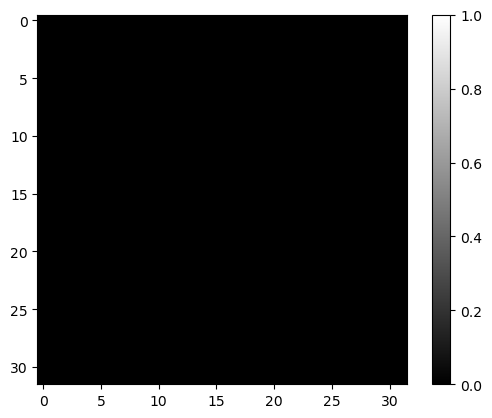

In [8]:
num_of_train_stars = len(dataset_train_no_sfe['stars'])
num_of_test_stars = len(dataset_test_no_sfe['stars'])

num_of_stars = num_of_train_stars + num_of_test_stars
print(num_of_stars)

shape = dataset_train_no_sfe['stars'][0].shape

masks = np.zeros((num_of_stars, shape[0], shape[1]))
print(masks.shape)

plt.imshow(masks[0], cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [9]:
dataset_train_no_sfe.keys()

dict_keys(['stars', 'noisy_stars', 'positions', 'SEDs', 'zernike_GT', 'zernike_prior', 'zernike_error', 'polynomial_coeffs', 'parameters'])

In [10]:
np.shape(dataset_train_no_sfe['stars'])

(2000, 32, 32)

In [11]:
print("Min pixel value:", dataset_train_no_sfe['noisy_stars'].min())
print("Max pixel value:", dataset_train_no_sfe['noisy_stars'].max())
print("Any all-zero PSFs:", np.any(np.sum(dataset_train_no_sfe['noisy_stars'], axis=(1, 2)) == 0))

Min pixel value: -0.009326409712167893
Max pixel value: 0.3376700959203016
Any all-zero PSFs: False


1723


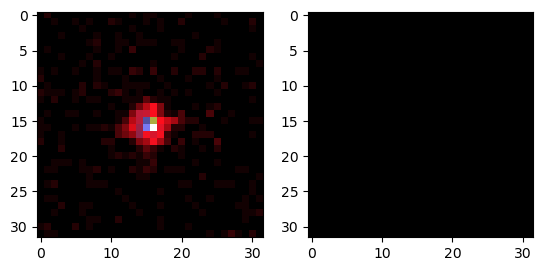

In [12]:
idx = np.random.randint(0, 2000)
print(idx)
# Add masks to the dataset
plt.subplot(1, 2, 1)
plt.imshow(dataset_train_2000['noisy_stars'][idx]*(1-masks[idx]), vmin=0, cmap='gist_stern')
plt.subplot(1, 2, 2)
plt.imshow(masks[idx], cmap='gray', vmin=0, vmax=1)
plt.show()

167


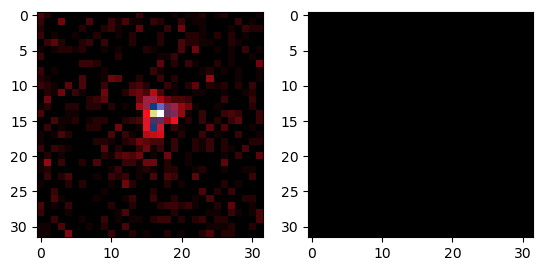

In [27]:
idx = np.random.randint(0, 2000)
print(idx)
# Add masks to the dataset
plt.subplot(1, 2, 1)
plt.imshow(dataset_train_sfe['noisy_stars'][idx]*(1-masks[idx]), vmin=0, cmap='gist_stern')
plt.subplot(1, 2, 2)
plt.imshow(masks[idx], cmap='gray', vmin=0, vmax=1)
plt.show()

In [16]:
dataset_train_2000.keys()

dict_keys(['stars', 'noisy_stars', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters', 'masks'])

In [13]:
dataset_train_2000['masks'] = masks[:2000]
np.save('../masked_dataset/train_Euclid_res_2000_TrainStars_she_unit_masked_id_001.npy', dataset_train_2000, allow_pickle=True)

dataset_train_200['masks'] = masks[:200]
np.save('../masked_dataset/train_Euclid_res_200_TrainStars_she_unit_masked_id_001.npy', dataset_train_200, allow_pickle=True)

In [15]:
len(masks[-400:])

400

In [17]:
dataset_test['masks'] = masks[2000:2400]
np.save('../masked_dataset/test_Euclid_res_she_unit_masked_id_001.npy', dataset_test, allow_pickle=True)

# Test loading of saved stars

In [2]:
train_mask_data = np.load("train_Euclid_res_2000_TrainStars_she_unit_masked_id_001.npy",allow_pickle=True)[()]

In [5]:
test_mask_data = np.load("test_Euclid_res_she_unit_masked_id_001.npy",allow_pickle=True)[()]

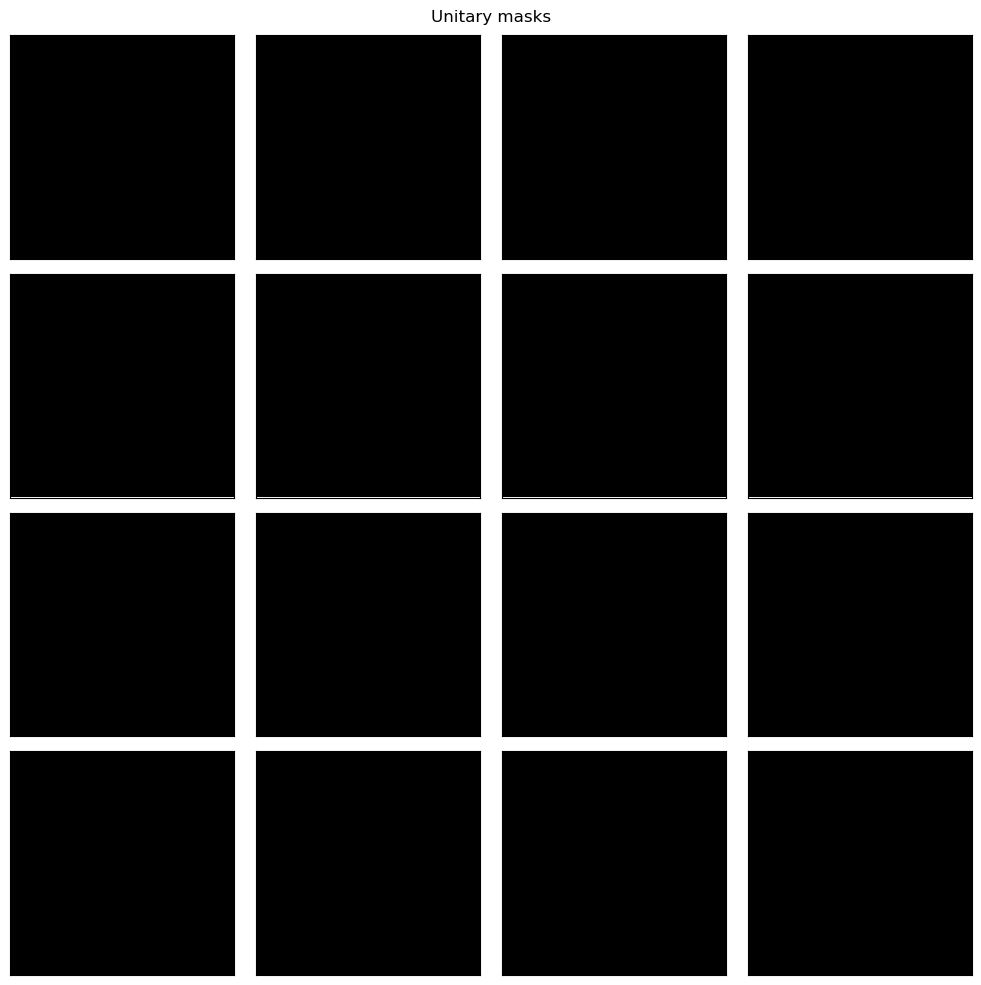

In [4]:
# Plot a bunch of masks
plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.randint(0, 2000, 16)):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_mask_data["masks"][idx], cmap='gray', vmin=0, vmax=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.suptitle('Unitary masks')
plt.tight_layout()
plt.show()

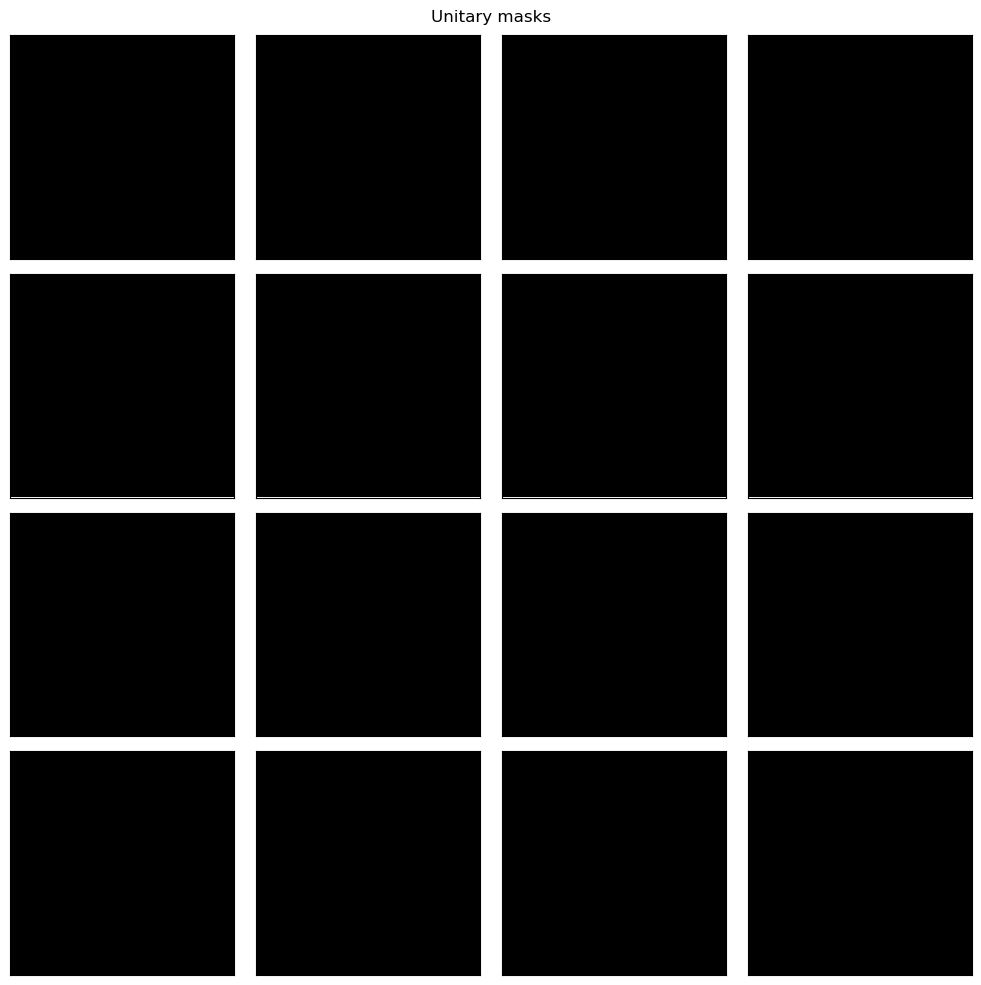

In [7]:
# Plot a bunch of masks
plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.randint(0, 400, 16)):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_mask_data["masks"][idx], cmap='gray', vmin=0, vmax=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.suptitle('Unitary masks')
plt.tight_layout()
plt.show()